In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

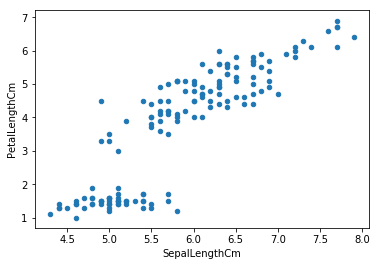

In [8]:
df[features].plot.scatter(0, 1)

In [16]:
X = df[features]
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [23]:
k = 3
kmeans = cluster.KMeans(n_clusters=k) # k is the number of clusters
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
y_cluster_pred = kmeans.predict(X)

In [26]:
y_cluster_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

In [58]:
points = pd.DataFrame(X, columns=features)

In [59]:
points.head()

,SepalLengthCm,PetalLengthCm
0,-0.900681,-1.341272
1,-1.143017,-1.341272
2,-1.385353,-1.398138
3,-1.506521,-1.284407
4,-1.021849,-1.341272


In [60]:
points["cluster"] = y_cluster_pred

In [61]:
points.head()

,SepalLengthCm,PetalLengthCm,cluster
0,-0.900681,-1.341272,1
1,-1.143017,-1.341272,1
2,-1.385353,-1.398138,1
3,-1.506521,-1.284407,1
4,-1.021849,-1.341272,1


In [62]:
colors = ["red", "blue", "green"]
points["colors"] = points.cluster.apply(lambda c: colors[c])

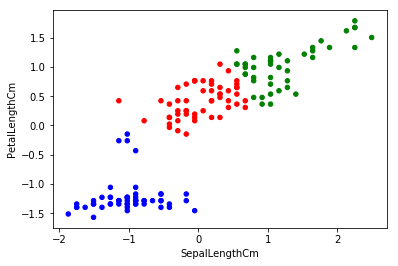

In [63]:
points.plot.scatter(0, 1, color = points.colors)

In [64]:
kmeans.cluster_centers_

array([[ 0.03665519,  0.41727267],
       [-1.01511749, -1.22859407],
       [ 1.22961906,  1.02857275]])

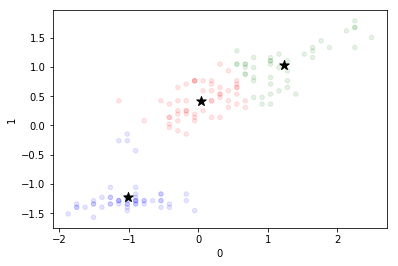

In [65]:
fig, ax = plt.subplots()
points.plot.scatter(0, 1, color = points.colors, ax = ax, alpha = 0.1)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0,1,
                    color = "black" , ax = ax, marker = "*", s = 100)

In [71]:
distances = np.zeros(len(points))
for i in range(k):
    cluster_points = points[points.cluster == i]
    cluster_center = kmeans.cluster_centers_[i]
    distances[points.cluster == i] = np.sum((cluster_points.values[:, :2] - cluster_center) ** 2, axis = 1)
points["distance"] = np.sqrt(distances)
points.head()

,SepalLengthCm,PetalLengthCm,cluster,colors,distance
0,-0.900681,-1.341272,1,blue,0.160599
1,-1.143017,-1.341272,1,blue,0.170454
2,-1.385353,-1.398138,1,blue,0.407209
3,-1.506521,-1.284407,1,blue,0.494562
4,-1.021849,-1.341272,1,blue,0.112879


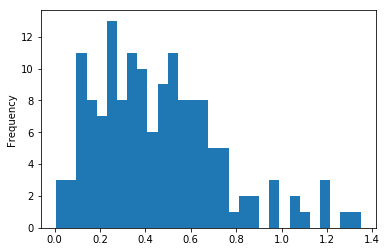

In [73]:
points.distance.plot.hist(bins = 30)

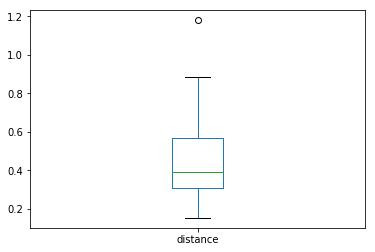

In [75]:
points[points.cluster==0].distance.plot.box()

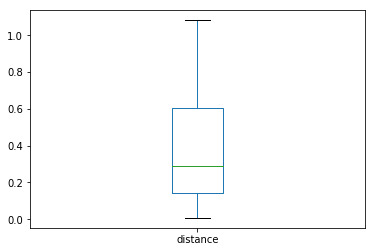

In [76]:
points[points.cluster==1].distance.plot.box()

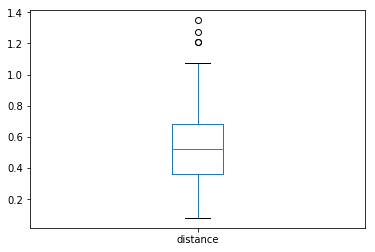

In [77]:
points[points.cluster==2].distance.plot.box()

In [79]:
points["outlier"] = False
points.head()

,SepalLengthCm,PetalLengthCm,cluster,colors,distance,outlier
0,-0.900681,-1.341272,1,blue,0.160599,False
1,-1.143017,-1.341272,1,blue,0.170454,False
2,-1.385353,-1.398138,1,blue,0.407209,False
3,-1.506521,-1.284407,1,blue,0.494562,False
4,-1.021849,-1.341272,1,blue,0.112879,False


In [90]:
points["outlier"] = False
points.loc[points.distance>0.9, "outlier"] = True
points

,SepalLengthCm,PetalLengthCm,cluster,colors,distance,outlier
0,-0.900681,-1.341272,1,blue,0.160599,False
1,-1.143017,-1.341272,1,blue,0.170454,False
2,-1.385353,-1.398138,1,blue,0.407209,False
3,-1.506521,-1.284407,1,blue,0.494562,False
4,-1.021849,-1.341272,1,blue,0.112879,False
5,-0.537178,-1.170675,1,blue,0.481437,False
6,-1.506521,-1.341272,1,blue,0.504156,False
7,-1.021849,-1.284407,1,blue,0.056217,False
8,-1.748856,-1.341272,1,blue,0.742340,False
9,-1.143017,-1.284407,1,blue,0.139547,False


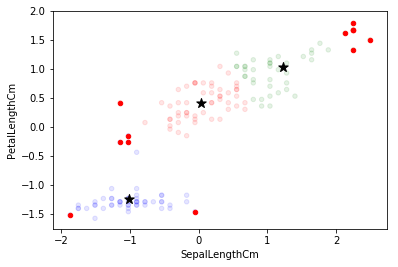

In [93]:
fig, ax = plt.subplots()
points.plot.scatter(0, 1, color = points.colors, ax = ax, alpha = 0.1)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0,1,
                    color = "black" , ax = ax, marker = "*", s = 100)
points[points.outlier].plot.scatter(0, 1, color = "red", ax = ax)

# Elbow method to find the number of clusters

In [96]:
scores = []
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k) # k is the number of clusters
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

Text(0,0.5,'Initia scores')

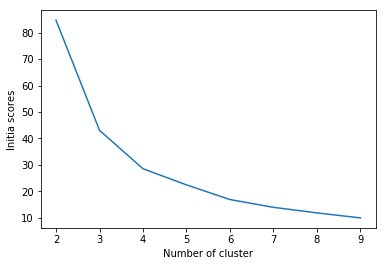

In [99]:
plt.plot(range(2, 10), scores)
plt.xlabel("Number of cluster")
plt.ylabel("Initia scores")

In [100]:
metrics.homogeneity_score(df.Species, y_cluster_pred)

0.5826296711195839

In [101]:
from skimage import io

In [102]:
img = io.imread("/Users/abulbasar/Downloads/1469162215-how-to-read-faces.jpg")

In [104]:
img.shape

(466, 700, 3)

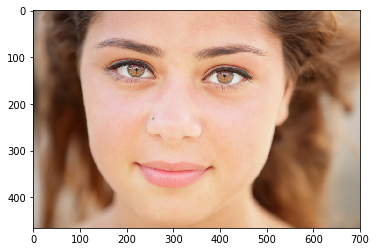

In [105]:
plt.imshow(img)

In [106]:
img_unroll = img.reshape((-1, 3))

In [108]:
img_unroll.shape

(326200, 3)

In [109]:
img_unroll[:10]

array([[118, 113, 107],
       [120, 115, 109],
       [125, 118, 110],
       [129, 122, 114],
       [134, 125, 116],
       [139, 129, 119],
       [143, 133, 123],
       [148, 135, 126],
       [153, 141, 129],
       [155, 143, 131]], dtype=uint8)

In [112]:
img_z = (img_unroll - np.mean(img_unroll, axis = 0))/np.std(img_unroll, axis = 0)

In [113]:
img_z

array([[-1.16752922, -0.54863832, -0.21984482],
       [-1.13334303, -0.51337719, -0.18472091],
       [-1.04787755, -0.4604855 , -0.16715895],
       ...,
       [-0.70601564, -0.31944098, -0.18472091],
       [-0.72310874, -0.33707154, -0.20228286],
       [-0.72310874, -0.33707154, -0.20228286]])

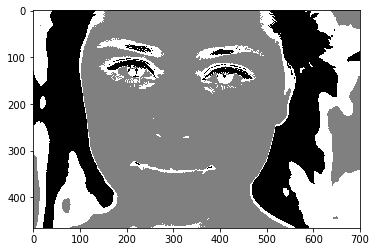

In [127]:
kmeans = cluster.KMeans(n_clusters=3)
y = kmeans.fit_predict(img_z)
plt.imshow(y.reshape((466, 700)), cmap="gray")

In [117]:
pd.Series(y).value_counts()/len(y)

0    0.544917
1    0.245941
2    0.209142
dtype: float64

In [118]:
len(y)

326200

In [119]:
img.shape

(466, 700, 3)

In [120]:
466 * 700

326200

In [122]:
y.reshape((466, 700, 1)).shape

(466, 700, 1)

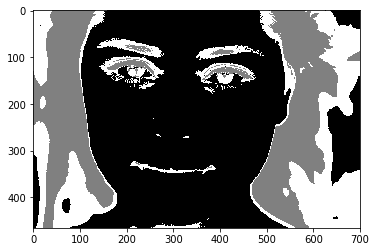

In [126]:
plt.imshow(y.reshape((466, 700)), cmap="gray")

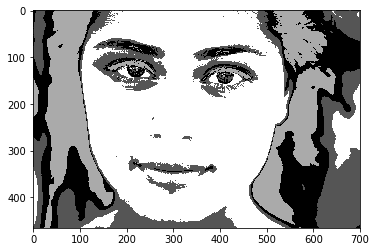

In [128]:
kmeans = cluster.KMeans(n_clusters=4)
y = kmeans.fit_predict(img_z)
plt.imshow(y.reshape((466, 700)), cmap="gray")